In [28]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()
 
# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data", train = True, download = True, transform = tensor_transform)
 
# DataLoader is used to load the dataset 
loader = torch.utils.data.DataLoader(dataset = dataset, batch_size = 32, shuffle = True)

In [14]:
class AutoEncoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
         
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [15]:
model = AutoEncoder()
 
loss_function = torch.nn.MSELoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-1, weight_decay = 1e-8)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

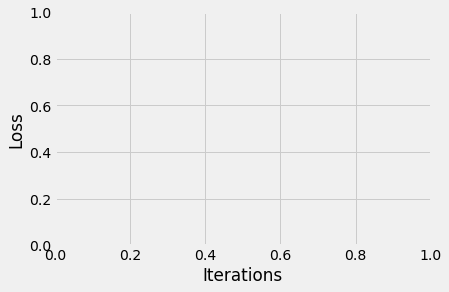

In [16]:
epochs = 2
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
       
        image = image.reshape(-1, 28*28)
       
        reconstructed = model(image)
       
        loss = loss_function(reconstructed, image)
       
      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
       
        losses.append(loss)
    outputs.append((epoch, image, reconstructed))

plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])


In [53]:
for i, item in enumerate(image):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

for i, item in enumerate(reconstructed):
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])


AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'